In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('shooting_data_pres.csv')

In [3]:
# merging two csv files 
df = pd.concat( 
    map(pd.read_csv, ['shooting_data_22.csv', 'shooting_data_x.csv', 'shooting_data_23.csv']), ignore_index=True)

In [4]:
df.head(10)

,ID,frameNumber,Goal,distanceToGoal,Height,angleToGoal,shotType,numDefenders,underPressure
0,76561198807532049,1249,0,2641.747045,106.489998,15.931531,['open play'],0,0.0
1,76561198960239428,1538,0,6595.010693,1673.569946,48.796571,"['dribble', 'aerial']",3,1.0
2,76561198960239428,1580,0,3623.191543,1446.380005,44.570147,['aerial'],1,1.0
3,76561198299709908,2198,0,3407.170913,460.809998,69.797249,['aerial'],0,NaN
4,76561198299709908,2664,0,3766.225661,496.260010,59.491291,"['dribble', 'aerial']",1,1.0
5,76561198136523266,2896,0,2962.306168,108.830002,38.827789,['open play'],1,0.0
6,76561198873686308,3482,0,2501.582566,780.859985,63.651969,"['pass', 'aerial']",0,0.0
7,76561198960239428,3538,1,1110.371628,143.259995,38.050749,['open play'],1,0.0
8,76561198873686308,4894,0,2296.611627,207.869995,21.320029,['dribble'],2,0.0
9,76561198873686308,5756,0,2310.567409,440.649994,44.829075,"['pass', 'aerial']",0,1.0


In [5]:
shooting = df.drop(['ID', 'frameNumber'], axis=1)
shooting

,Goal,distanceToGoal,Height,angleToGoal,shotType,numDefenders,underPressure
0,0,2641.747045,106.489998,15.931531,['open play'],0,0.0
1,0,6595.010693,1673.569946,48.796571,"['dribble', 'aerial']",3,1.0
2,0,3623.191543,1446.380005,44.570147,['aerial'],1,1.0
3,0,3407.170913,460.809998,69.797249,['aerial'],0,NaN
4,0,3766.225661,496.260010,59.491291,"['dribble', 'aerial']",1,1.0
...,...,...,...,...,...,...,...
16228,1,3855.696609,253.880005,26.296661,['pass'],2,0.0
16229,0,5702.766578,233.800003,53.445005,['pass'],1,0.0
16230,0,6558.298644,259.109985,53.110611,['dribble'],2,1.0
16231,1,5325.946227,181.369995,57.922126,['pass'],1,0.0


In [6]:
df["Goal"].value_counts()

Goal
0    12778
1     3455
Name: count, dtype: int64

In [7]:
print(df["shotType"].unique())

["['open play']" "['dribble', 'aerial']" "['aerial']" "['pass', 'aerial']"
 "['dribble']" "['pass']"]


In [8]:
df["shotType"].value_counts()

shotType
['open play']            3644
['pass']                 3106
['pass', 'aerial']       3047
['aerial']               2847
['dribble', 'aerial']    2104
['dribble']              1485
Name: count, dtype: int64

In [9]:
shooting_enc = pd.get_dummies(shooting, columns = ['shotType'], dtype=int) 
print(shooting_enc)

       Goal  distanceToGoal       Height  angleToGoal  numDefenders  \
0         0     2641.747045   106.489998    15.931531             0   
1         0     6595.010693  1673.569946    48.796571             3   
2         0     3623.191543  1446.380005    44.570147             1   
3         0     3407.170913   460.809998    69.797249             0   
4         0     3766.225661   496.260010    59.491291             1   
...     ...             ...          ...          ...           ...   
16228     1     3855.696609   253.880005    26.296661             2   
16229     0     5702.766578   233.800003    53.445005             1   
16230     0     6558.298644   259.109985    53.110611             2   
16231     1     5325.946227   181.369995    57.922126             1   
16232     0     1343.000943   496.420013    50.671622             0   

       underPressure  shotType_['aerial']  shotType_['dribble', 'aerial']  \
0                0.0                    0                             

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
feature_cols = ["distanceToGoal", "Height", "angleToGoal", "numDefenders", "underPressure", "shotType_['aerial']", "shotType_['dribble', 'aerial']",
               "shotType_['dribble']", "shotType_['open play']", "shotType_['pass', 'aerial']", "shotType_['pass']"]
X = shooting_enc[feature_cols]
y = shooting["Goal"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

imputer = SimpleImputer(missing_values = np.nan, 
                        strategy ='mean')
imputer = imputer.fit(X_scaled)
X_scaled = imputer.transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=16)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=16)

In [116]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=16,C=0.1, penalty="l2")
logreg.fit(X_train, y_train)
log_y_pred = logreg.predict(X_val)
log_y_proba = logreg.predict_proba(X_val)

In [117]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_features= 8, n_estimators= 30)
forest.fit(X_train, y_train)
forest_y_pred = forest.predict(X_val)
forest_y_proba = forest.predict_proba(X_val)

In [120]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', probability=True)
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_val)
svc_y_proba = svc.predict_proba(X_val)

svr_pred = []
for pred in svr_y_pred:
    if pred > 1:
        svr_pred.append(0.99)
    elif pred < 0:
        svr_pred.append(0)
    else:
        svr_pred.append(pred)

from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(max_depth=2, n_estimators=120)
gb.fit(X_train, y_train)
gb_y_pred = gb.predict(X_val)

In [128]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gbc.fit(X_train, y_train)
gbc_y_pred = gbc.predict(X_val)
gbc_y_proba = gbc.predict_proba(X_val)

sumX, sum = 0, 0
goals, predicted_goals, sum = 0, 0, 0
for shot in gbc_pred:
    sum += shot[1]
for shot in y_test:
    if shot == 1:
        goals += 1

print("goals", goals)
print("predicted goals", sum)

gb_pred = []
for prediction in gb_y_pred:
    if prediction < 0:
        gb_pred.append(0)
    else:
        gb_pred.append(prediction)

In [122]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2)
ada = AdaBoostClassifier(n_estimators=100, estimator=dtc, learning_rate=1)

In [123]:
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_val)
ada_y_proba = ada.predict_proba(X_val)

In [168]:
from prettytable import PrettyTable
result= PrettyTable(["Algorithm", "Precision", "Recall", "AUC","MCC","Log Loss","Brier Score","Sum of xG"])

In [262]:
from sklearn import metrics
def model_evaluation(algorithm, y_val, y_pred, y_proba):
    '''y_pred_binary = []
    for prediction in y_pred:
        if prediction > 0.4:
            y_pred_binary.append(1)
        else:
            y_pred_binary.append(0)'''
    prob_goal=[]
    for pred in y_proba:
        prob_goal.append(pred[1])
        
    cnf_matrix = metrics.confusion_matrix(y_val, y_pred)
    classification_report = metrics.classification_report(y_val, y_pred)
    precision = metrics.precision_score(y_val, y_pred)
    recall = metrics.recall_score(y_val, y_pred)
    auc =  metrics.roc_auc_score(y_val, prob_goal)
    mcc = metrics.matthews_corrcoef(y_val, y_pred)
    lgloss = metrics.log_loss(y_val, prob_goal)
    bs = metrics.brier_score_loss(y_val, prob_goal)

    goals, predicted_goals, sum = 0, 0, 0
    for shot in prob_goal:
        sum += shot
    for shot in y_pred:
        if shot == 1:
            predicted_goals += 1
    for shot in y_val:
        if shot == 1:
            goals += 1

    #rps = crps(y_val, y_pred, sample_weight=None)

    algo_name = str(algorithm)
    algo = algo_name.split("(")
    
    result_res.add_row([algo[0], "{:.2f}".format(precision), "{:.2f}".format(recall), "{:.2f}".format(auc),"{:.2f}".format(mcc),"{:.2f}".format(lgloss), "{:.2f}".format(bs),"{:.2f}".format(sum)])
    
    print(algorithm)
    print("\nConfusion Matrix:\n", cnf_matrix)
    print("\nClassification Report:\n", classification_report)
    print("\nPrecision | Recall:\n    {}    |     {}\n".format(precision, recall)) 
    print("Area Under ROC:\n", auc)
    print("\nActual Goals Scored: {}  |  Predicted Goals: {}  |  Sum of xG: {}".format(goals, predicted_goals, sum))

In [171]:
model_evaluation(logreg, y_val, log_y_pred, log_y_proba)
model_evaluation(gbc, y_val, gbc_y_pred, gbc_y_proba)
model_evaluation(ada, y_val, ada_y_pred, ada_y_proba)
model_evaluation(svc, y_val, svc_y_pred, svc_y_proba)
model_evaluation(forest, y_val, forest_y_pred, forest_y_proba)

LogisticRegression(C=0.1, random_state=16)

Confusion Matrix:
 [[2010   39]
 [ 492   57]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      2049
           1       0.59      0.10      0.18       549

    accuracy                           0.80      2598
   macro avg       0.70      0.54      0.53      2598
weighted avg       0.76      0.80      0.73      2598


Precision | Recall:
    0.59375    |     0.10382513661202186

Area Under ROC:
 0.7479298178239686

Actual Goals Scored: 549  |  Predicted Goals: 96  |  Sum of xG: 548.2177533928311
GradientBoostingClassifier(max_depth=2, n_estimators=120)

Confusion Matrix:
 [[1984   65]
 [ 445  104]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      2049
           1       0.62      0.19      0.29       549

    accuracy                           0.80      2598
   macro avg       0.72     

In [172]:
print(result)

+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|         Algorithm          | Precision | Recall | AUC  | MCC  | Log Loss | Brier Score | Sum of xG |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|     LogisticRegression     |    0.59   |  0.10  | 0.75 | 0.18 |   0.45   |     0.14    |   548.22  |
| GradientBoostingClassifier |    0.62   |  0.19  | 0.76 | 0.26 |   0.44   |     0.14    |   553.50  |
|     AdaBoostClassifier     |    0.55   |  0.26  | 0.74 | 0.28 |   0.66   |     0.23    |  1244.34  |
|            SVC             |    0.60   |  0.07  | 0.68 | 0.16 |   0.49   |     0.16    |   553.08  |
|   RandomForestClassifier   |    0.63   |  0.36  | 0.77 | 0.38 |   0.66   |     0.13    |   566.73  |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+


In [239]:
forest_test_pred = forest.predict(X_test)
forest_test_proba = forest.predict_proba(X_test)

In [240]:
model_evaluation(forest, y_test, forest_test_pred, forest_test_proba)

RandomForestClassifier(max_features=8, n_estimators=30)

Confusion Matrix:
 [[2381  143]
 [ 449  274]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.89      2524
           1       0.66      0.38      0.48       723

    accuracy                           0.82      3247
   macro avg       0.75      0.66      0.69      3247
weighted avg       0.80      0.82      0.80      3247


Precision | Recall:
    0.657074340527578    |     0.3789764868603043

Area Under ROC:
 0.7787557566312228

Actual Goals Scored: 723  |  Predicted Goals: 417  |  Sum of xG: 714.5333333333422


In [241]:
gbc_test_pred = gbc.predict(X_test)
gbc_test_proba = gbc.predict_proba(X_test)

In [242]:
model_evaluation(gbc, y_test, gbc_test_pred, gbc_test_proba)

GradientBoostingClassifier(max_depth=2, n_estimators=120)

Confusion Matrix:
 [[2447   77]
 [ 602  121]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88      2524
           1       0.61      0.17      0.26       723

    accuracy                           0.79      3247
   macro avg       0.71      0.57      0.57      3247
weighted avg       0.76      0.79      0.74      3247


Precision | Recall:
    0.6111111111111112    |     0.1673582295988935

Area Under ROC:
 0.7375376194891421

Actual Goals Scored: 723  |  Predicted Goals: 198  |  Sum of xG: 675.8202269176144


#SMOTE Implementation

In [254]:
from collections import Counter
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy=0.3, random_state = 2)

print('sampled dataset shape %s' % Counter(y_train))

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_res))

sampled dataset shape Counter({0: 8205, 1: 2183})
Resampled dataset shape Counter({0: 8205, 1: 2461})


In [263]:
#Logistic Regression with SMOTE
logreg_res = LogisticRegression(random_state=16,C=0.1, penalty="l2")
logreg_res.fit(X_train_res, y_train_res)
log_y_pred_res = logreg_res.predict(X_val)
log_y_proba_res = logreg_res.predict_proba(X_val)

In [264]:
#Forest with SMOTE
forest_res = RandomForestClassifier(max_features= 8, n_estimators= 30)
forest_res.fit(X_train_res, y_train_res)
forest_y_pred_res= forest_res.predict(X_val)
forest_y_proba_res = forest_res.predict_proba(X_val)

In [265]:
#SVC with SMOTE
svc_res = SVC(kernel='rbf', probability=True)
svc_res.fit(X_train_res, y_train_res)
svc_y_pred_res = svc_res.predict(X_val)
svc_y_proba_res = svc_res.predict_proba(X_val)

In [266]:
#Gradient Boost with SMOTE
gbc_res = GradientBoostingClassifier(max_depth=2, n_estimators=120)
gbc_res.fit(X_train_res, y_train_res)
gbc_y_pred_res = gbc_res.predict(X_val)
gbc_y_proba_res = gbc_res.predict_proba(X_val)

In [267]:
#ADA Boost with SMOTE
dtc = DecisionTreeClassifier(max_depth=2)
ada_res = AdaBoostClassifier(n_estimators=100, estimator=dtc, learning_rate=1)
ada_res.fit(X_train_res, y_train_res)
ada_y_pred_res = ada_res.predict(X_val)
ada_y_proba_res = ada_res.predict_proba(X_val)

In [261]:
result_res= PrettyTable(["Algorithm", "Precision", "Recall", "AUC","MCC","Log Loss","Brier Score", "Sum of xG"])

In [268]:
model_evaluation(logreg_res, y_val, log_y_pred_res, log_y_proba_res)
model_evaluation(gbc_res, y_val, gbc_y_pred_res, gbc_y_proba_res)
model_evaluation(ada_res, y_val, ada_y_pred_res, ada_y_proba_res)
model_evaluation(svc_res, y_val, svc_y_pred_res, svc_y_proba_res)
model_evaluation(forest_res, y_val, forest_y_pred_res, forest_y_proba_res)

LogisticRegression(C=0.1, random_state=16)

Confusion Matrix:
 [[1989   60]
 [ 465   84]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      2049
           1       0.58      0.15      0.24       549

    accuracy                           0.80      2598
   macro avg       0.70      0.56      0.56      2598
weighted avg       0.76      0.80      0.75      2598


Precision | Recall:
    0.5833333333333334    |     0.15300546448087432

Area Under ROC:
 0.7477191326170035

Actual Goals Scored: 549  |  Predicted Goals: 144  |  Sum of xG: 594.5411161516435
GradientBoostingClassifier(max_depth=2, n_estimators=120)

Confusion Matrix:
 [[1952   97]
 [ 412  137]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.95      0.88      2049
           1       0.59      0.25      0.35       549

    accuracy                           0.80      2598
   macro avg    

In [269]:
print(result_res) #SMOTE sample_strategy = 0.3

+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|         Algorithm          | Precision | Recall | AUC  | MCC  | Log Loss | Brier Score | Sum of xG |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|     LogisticRegression     |    0.58   |  0.15  | 0.75 | 0.22 |   0.45   |     0.14    |   594.54  |
| GradientBoostingClassifier |    0.59   |  0.25  | 0.76 | 0.29 |   0.44   |     0.14    |   596.88  |
|     AdaBoostClassifier     |    0.51   |  0.28  | 0.74 | 0.27 |   0.66   |     0.23    |  1234.34  |
|            SVC             |    0.59   |  0.12  | 0.69 | 0.19 |   0.49   |     0.15    |   600.77  |
|   RandomForestClassifier   |    0.63   |  0.39  | 0.78 | 0.39 |   0.60   |     0.13    |   595.80  |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+


In [186]:
print(results_res) #SMOTE sample_strategy = 0.6

+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|         Algorithm          | Precision | Recall | AUC  | MCC  | Log Loss | Brier Score | Sum of xG |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+
|     LogisticRegression     |    0.43   |  0.50  | 0.75 | 0.31 |   0.51   |     0.17    |   906.30  |
| GradientBoostingClassifier |    0.46   |  0.52  | 0.76 | 0.34 |   0.49   |     0.16    |   884.95  |
|     AdaBoostClassifier     |    0.42   |  0.52  | 0.74 | 0.30 |   0.67   |     0.24    |  1267.37  |
|            SVC             |    0.44   |  0.46  | 0.73 | 0.30 |   0.51   |     0.17    |   898.08  |
|   RandomForestClassifier   |    0.52   |  0.49  | 0.78 | 0.37 |   0.53   |     0.15    |   753.83  |
+----------------------------+-----------+--------+------+------+----------+-------------+-----------+


In [257]:
forest_res_test_pred = forest_res.predict(X_test)
forest_res_test_proba = forest_res.predict_proba(X_test)

In [258]:
model_evaluation(forest_res, y_test, forest_res_test_pred, forest_res_test_proba)

RandomForestClassifier(max_features=8, n_estimators=30)

Confusion Matrix:
 [[2362  162]
 [ 456  267]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.94      0.88      2524
           1       0.62      0.37      0.46       723

    accuracy                           0.81      3247
   macro avg       0.73      0.65      0.67      3247
weighted avg       0.79      0.81      0.79      3247


Precision | Recall:
    0.6223776223776224    |     0.36929460580912865

Area Under ROC:
 0.782335498988411

Actual Goals Scored: 723  |  Predicted Goals: 429  |  Sum of xG: 731.5000000000049


In [259]:
gbc_res_test_pred = gbc_res.predict(X_test)
gbc_res_test_proba = gbc_res.predict_proba(X_test)

In [260]:
model_evaluation(gbc_res, y_test, gbc_res_test_pred, gbc_res_test_proba)

GradientBoostingClassifier(max_depth=2, n_estimators=120)

Confusion Matrix:
 [[2403  121]
 [ 569  154]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.95      0.87      2524
           1       0.56      0.21      0.31       723

    accuracy                           0.79      3247
   macro avg       0.68      0.58      0.59      3247
weighted avg       0.75      0.79      0.75      3247


Precision | Recall:
    0.56    |     0.21300138312586445

Area Under ROC:
 0.7368331788002533

Actual Goals Scored: 723  |  Predicted Goals: 275  |  Sum of xG: 730.4218949445489


In [43]:
#Forest Params
from scipy.stats import randint as sp_randint
param_dist = {"max_depth": [20, 40, 80, 120],
    "max_features": [6, 8, 16, 32],
    "n_estimators":[64, 128, 256, 512],
    "min_samples_split": sp_randint(2, 11), 
    "bootstrap": [True, False], 
    } 

In [187]:
#FOREST Grid Search
from sklearn.model_selection import RandomizedSearchCV
forest_random = RandomizedSearchCV(estimator=forest, param_distributions=param_dist,
                                   n_iter=20, cv=3)

forest_random.fit(X_train, y_train)

print(forest_random.best_params_)

{'bootstrap': True, 'max_depth': 120, 'max_features': 8, 'min_samples_split': 3, 'n_estimators': 64}


In [272]:
forest_random_res = RandomizedSearchCV(estimator=forest_res, param_distributions=param_dist,
                                   n_iter=20, cv=3)

forest_random_res.fit(X_train_res, y_train_res)

print(forest_random_res.best_params_)

{'bootstrap': True, 'max_depth': 120, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 128}


In [ ]:
{'bootstrap': True, 'max_depth': 10, 'max_features': 8, 'min_samples_split': 4, 'n_estimators': 64}
{'bootstrap': True, 'max_depth': 40, 'max_features': 8, 'min_samples_split': 4, 'n_estimators': 128}
{'bootstrap': True, 'max_depth': 80, 'max_features': 6, 'min_samples_split': 2, 'n_estimators': 64}


In [188]:
forest_optimized = RandomForestClassifier(bootstrap=True,max_features=8, max_depth=120, min_samples_split=3, n_estimators=64)
forest_optimized.fit(X_train, y_train)
forest_opt_pred = forest_optimized.predict(X_val)
forest_opt_proba = forest_optimized.predict_proba(X_val)

In [189]:
model_evaluation(forest_optimized, y_val, forest_opt_pred, forest_opt_proba)

RandomForestClassifier(max_depth=120, max_features=8, min_samples_split=3,
                       n_estimators=64)

Confusion Matrix:
 [[1939  110]
 [ 340  209]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.95      0.90      2049
           1       0.66      0.38      0.48       549

    accuracy                           0.83      2598
   macro avg       0.75      0.66      0.69      2598
weighted avg       0.81      0.83      0.81      2598


Precision | Recall:
    0.6551724137931034    |     0.3806921675774135

Area Under ROC:
 0.787339952582494

Actual Goals Scored: 549  |  Predicted Goals: 319  |  Sum of xG: 567.9539434523821


In [273]:
forest_optimized_res = RandomForestClassifier(bootstrap=True,max_features=6, max_depth=120, min_samples_split=2, n_estimators=128)
forest_optimized_res.fit(X_train_res, y_train_res)
forest_opt_pred_res = forest_optimized_res.predict(X_val)
forest_opt_proba_res = forest_optimized_res.predict_proba(X_val)

In [274]:
model_evaluation(forest_optimized_res, y_val, forest_opt_pred_res, forest_opt_proba_res)

RandomForestClassifier(max_depth=120, max_features=6, n_estimators=128)

Confusion Matrix:
 [[1922  127]
 [ 336  213]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      2049
           1       0.63      0.39      0.48       549

    accuracy                           0.82      2598
   macro avg       0.74      0.66      0.69      2598
weighted avg       0.80      0.82      0.81      2598


Precision | Recall:
    0.6264705882352941    |     0.3879781420765027

Area Under ROC:
 0.7862927493174955

Actual Goals Scored: 549  |  Predicted Goals: 340  |  Sum of xG: 589.7109375


In [198]:
#GB Params
gb_params = {
    "criterion": ['friedman_mse', 'squared_error'],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[10]
    }

In [199]:
#GB Random search
gbc_random = RandomizedSearchCV(estimator=gbc, param_distributions=gb_params,
                                   n_iter=20, cv=3)

gbc_random.fit(X_train, y_train)

print(gbc_random.best_params_)

{'subsample': 0.5, 'n_estimators': 10, 'min_samples_split': 0.2090909090909091, 'min_samples_leaf': 0.24545454545454548, 'max_features': 'log2', 'max_depth': 3, 'learning_rate': 0.2, 'criterion': 'squared_error'}


In [200]:
gbc_opt = GradientBoostingClassifier(subsample= 0.5, n_estimators=10, min_samples_split=0.2090909090909091, min_samples_leaf= 0.2090909090909091,
                                     max_features= 'log2', max_depth= 3, learning_rate= 0.2, criterion='squared_error')
gbc_opt.fit(X_train, y_train)
gbc_opt_pred = gbc_opt.predict(X_val)
gbc_opt_proba = gbc_opt.predict_proba(X_val)

In [202]:
gbc_opt_pred[200:250]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [204]:
model_evaluation(gbc_opt, y_val, gbc_opt_pred, gbc_opt_proba)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_features='log2',
                           min_samples_leaf=0.2090909090909091,
                           min_samples_split=0.2090909090909091,
                           n_estimators=10, subsample=0.5)

Confusion Matrix:
 [[2049    0]
 [ 549    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2049
           1       0.00      0.00      0.00       549

    accuracy                           0.79      2598
   macro avg       0.39      0.50      0.44      2598
weighted avg       0.62      0.79      0.70      2598


Precision | Recall:
    0.0    |     0.0

Area Under ROC:
 0.723575230175811

Actual Goals Scored: 549  |  Predicted Goals: 0  |  Sum of xG: 552.914530109415


C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classif

In [205]:
#ADA Params
ada_params = {
    "n_estimators": [100, 500,1000],
    "learning_rate": [0.0001, 0.001, 0.01, 0.1, 1.0]
}

In [206]:
#ADA Grid Search
ada_random = RandomizedSearchCV(ada, param_distributions=ada_params,
                        n_iter=20, cv=3)

ada_random.fit(X_train, y_train)

print(ada_random.best_params_)

C:\Users\axbar\ml\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 15 is smaller than n_iter=20. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'learning_rate': 0.1}


In [207]:
ada_opt = AdaBoostClassifier(n_estimators=100, learning_rate=0.01, estimator=dtc)
ada_opt.fit(X_train, y_train)
ada_opt_pred = ada_opt.predict(X_val)
ada_opt_proba = ada_opt.predict_proba(X_val)

In [208]:
model_evaluation(ada_opt, y_val, ada_opt_pred, ada_opt_proba)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=100)

Confusion Matrix:
 [[2049    0]
 [ 549    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2049
           1       0.00      0.00      0.00       549

    accuracy                           0.79      2598
   macro avg       0.39      0.50      0.44      2598
weighted avg       0.62      0.79      0.70      2598


Precision | Recall:
    0.0    |     0.0

Area Under ROC:
 0.7449553338471563

Actual Goals Scored: 549  |  Predicted Goals: 0  |  Sum of xG: 738.3782992223618


C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\axbar\ml\env\lib\site-packages\sklearn\metrics\_classif

In [213]:
#GB Random search with SMOTE
gbc_random_res = RandomizedSearchCV(estimator=gbc, param_distributions=gb_params,
                                   n_iter=20, cv=3)

gbc_random_res.fit(X_train_res, y_train_res)

print(gbc_random_res.best_params_)

{'subsample': 0.95, 'n_estimators': 10, 'min_samples_split': 0.46363636363636374, 'min_samples_leaf': 0.1, 'max_features': 'sqrt', 'max_depth': 5, 'learning_rate': 0.2, 'criterion': 'squared_error'}


In [270]:
gb_optres = GradientBoostingClassifier(subsample=0.95, n_estimators=10, min_samples_split=0.46363636363636374, min_samples_leaf=0.1,
                                      max_features='sqrt', max_depth=5, learning_rate=0.2, criterion='squared_error')
gb_optres.fit(X_train_res, y_train_res)
gb_optres_pred = gb_optres.predict(X_val)
gb_optres_proba = gb_optres.predict_proba(X_val)

In [271]:
model_evaluation(gb_optres, y_val, gb_optres_pred, gb_optres_proba)

GradientBoostingClassifier(criterion='squared_error', learning_rate=0.2,
                           max_depth=5, max_features='sqrt',
                           min_samples_leaf=0.1,
                           min_samples_split=0.46363636363636374,
                           n_estimators=10, subsample=0.95)

Confusion Matrix:
 [[2049    0]
 [ 549    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88      2049
           1       0.00      0.00      0.00       549

    accuracy                           0.79      2598
   macro avg       0.39      0.50      0.44      2598
weighted avg       0.62      0.79      0.70      2598


Precision | Recall:
    0.0    |     0.0

Area Under ROC:
 0.7485440941025032

Actual Goals Scored: 549  |  Predicted Goals: 0  |  Sum of xG: 603.2092831640808


Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [218]:
import shap
shap.initjs()

In [230]:
explainer_gbc = shap.Explainer(gbc)
shap_values = explainer_gbc.shap_values(X_val)

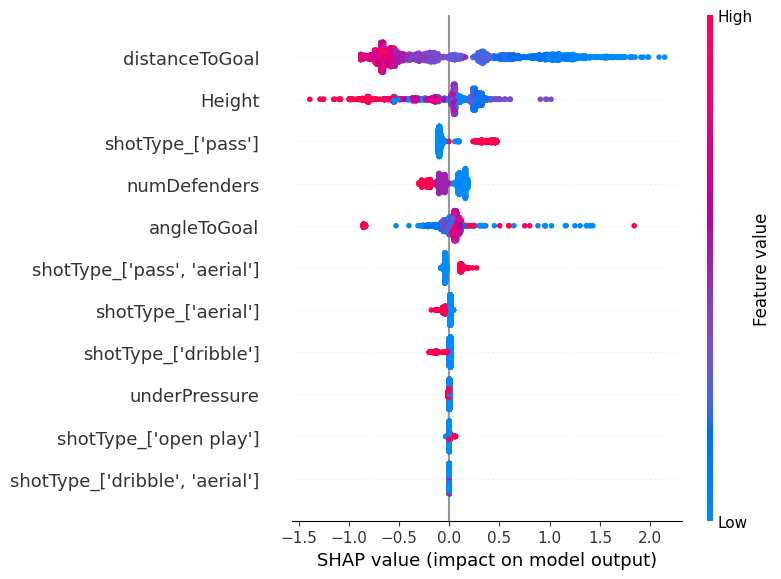

In [231]:
shap.summary_plot(shap_values, X_val, feature_names=X.columns)

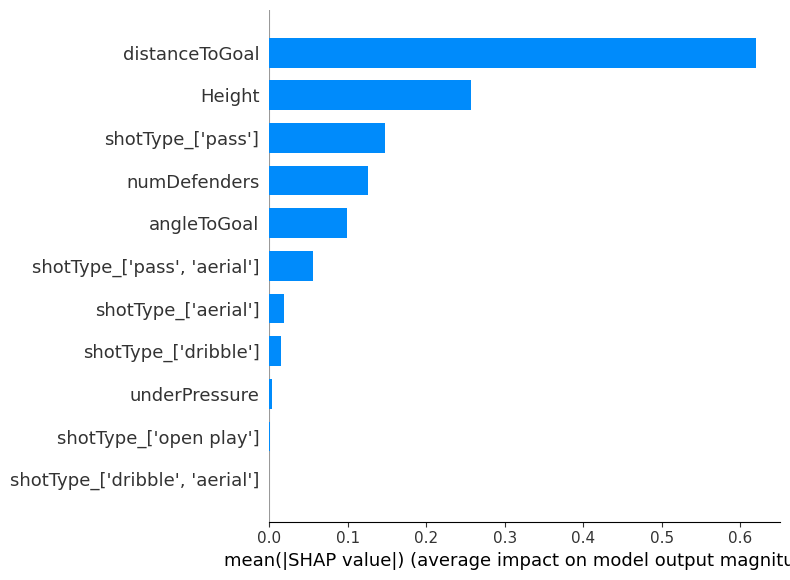

In [221]:
shap.summary_plot(shap_values, X_val, feature_names=X.columns, plot_type='bar')

In [224]:
explainer_forest = shap.Explainer(forest)
shap_values_forest = explainer_forest.shap_values(X_val)

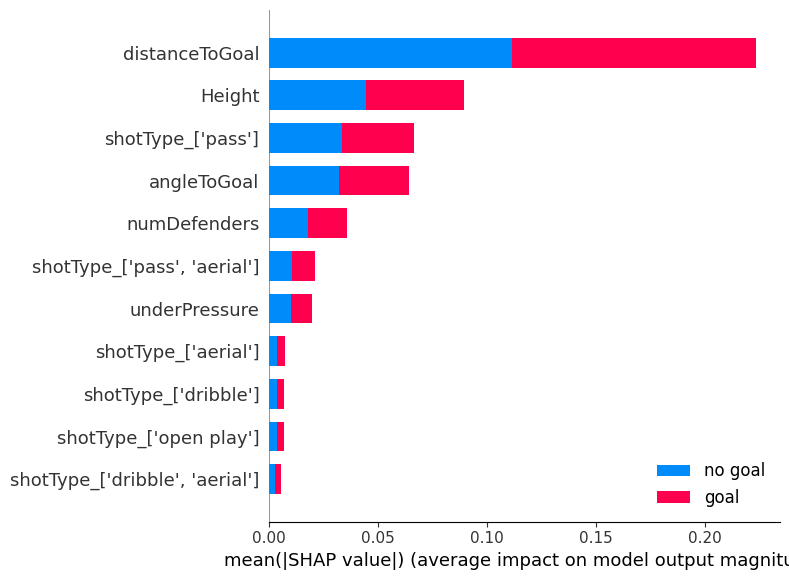

In [275]:
shap.summary_plot(shap_values_forest, X_val, feature_names=X.columns, plot_type='bar', class_names=['goal', 'no goal'])